# Is Aristotle's Natural Philosophy objective?

## Introduction
The scientific method is well known to be one of mankind's greatest creation. It allowed us to make observations about the world around us and discern what is fact and what is fiction. Before science, there was natural philosophy.

natural philosophy is
as a predecessor to the scientific method, we assume a level of objectivity higher than other schools of philosophy
objectivity is defined as

Here we will take Aristotle's work, try to classify it's topics (identify natural philosophy vs not) and determine the overall level of objectivity to try and single it out from other philosohical

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
#Setup
#Operations
import pandas as pd
import numpy as np
import sys
import os

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#NLP Cleaning
import spacy
from spacy.lang.en import English
import en_core_web_md
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#NLP Algorithms
import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from textblob import TextBlob

/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
#To allow for calling local functions
path_def='/Users/safiraraharjo/Documents/GitHub/ads-spring2023-project1-safiraharjo/'
sys.path.insert(0, path_def+'lib')

In [3]:
#Read data
df = pd.read_csv(path_def+'data/philosophy_data.csv')
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

NLP cleaning

In [4]:
from nlp_cleaning import cleaner
nlp = en_core_web_md.load()
cleaner(nlp,df,df.sentence_str)

title author    school  \
0       Plato - Complete Works  Plato     plato   
1       Plato - Complete Works  Plato     plato   
2       Plato - Complete Works  Plato     plato   
3       Plato - Complete Works  Plato     plato   
4       Plato - Complete Works  Plato     plato   
...                        ...    ...       ...   
360803  Women, Race, And Class  Davis  feminism   
360804  Women, Race, And Class  Davis  feminism   
360805  Women, Race, And Class  Davis  feminism   
360806  Women, Race, And Class  Davis  feminism   
360807  Women, Race, And Class  Davis  feminism   

                                           sentence_spacy  \
0        What's new, Socrates, to make you leave your ...   
1       Surely you are not prosecuting anyone before t...   
2       The Athenians do not call this a prosecution b...   
3                                   What is this you say?   
4       Someone must have indicted you, for you are no...   
...                                                   ...   
360803  But the socialization of housework including m...   
360804  The only significant steps toward endingdomest...   
360805  Working women, therefore, have a special and v...   
360806  Moreover, under capitalism, campaigns for jobs...   
360807  This strategy calls into question the validity...   

                                             sentence_str  \
0        What's new, Socrates, to make you leave your ...   
1       Surely you are not prosecuting anyone before t...   
2       The Athenians do not call this a prosecution b...   
3                                   What is this you say?   
4       Someone must have indicted you, for you are no...   
...                                                   ...   
360803  But the socialization of housework including m...   
360804  The only significant steps toward endingdomest...   
360805  Working women, therefore, have a special and v...   
360806  Moreover, under capitalism, campaigns for jobs...   
360807  This strategy calls into question the validity...   

        original_publication_date  corpus_edition_date  sentence_length  \
0                            -350                 1997              125   
1                            -350                 1997               69   
2                            -350                 1997               74   
3                            -350                 1997               21   
4                            -350                 1997              101   
...                           ...                  ...              ...   
360803                       1981                 1981              142   
360804                       1981                 1981              117   
360805                       1981                 1981               90   
360806                       1981                 1981              199   
360807                       1981                 1981              126   

                                         sentence_lowered  \
0        what's new, socrates, to make you leave your ...   
1       surely you are not prosecuting anyone before t...   
2       the athenians do not call this a prosecution b...   
3                                   what is this you say?   
4       someone must have indicted you, for you are no...   
...                                                   ...   
360803  but the socialization of housework including m...   
360804  the only significant steps toward endingdomest...   
360805  working women, therefore, have a special and v...   
360806  moreover, under capitalism, campaigns for jobs...   
360807  this strategy calls into question the validity...   

                                            tokenized_txt  \
0       ['what', 'new', 'socrates', 'to', 'make', 'you...   
1       ['surely', 'you', 'are', 'not', 'prosecuting',...   
2       ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3                    ['what', 'is', 'this', 'you', 'say']   
4      

We are only using aristotle, so filter

In [5]:
aristotle = df[df.author == 'Aristotle']

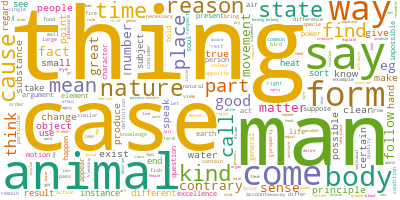

In [38]:
aristotle['cleaned_str'] = [' '.join(map(str, l)) for l in aristotle['cleaned']]
long_string = ','.join(list(aristotle['cleaned_str'].values))
wordcloud = WordCloud(background_color="white"
                      , contour_width=0.1
                      , contour_color="black"
                      , max_font_size=100
                      , random_state=42
                      , colormap="Dark2")
wordcloud.generate(long_string)
wordcloud.to_file(path_def+'output/aristotle_wc.png')
wordcloud.to_image()

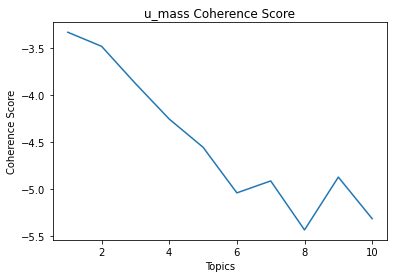

In [7]:
from coherence_modelling import coherence_score_viz
coherence_score_viz(aristotle['cleaned'],'u_mass',1,11,corpora,gensim.models.LdaMulticore,plt,CoherenceModel,path_def)

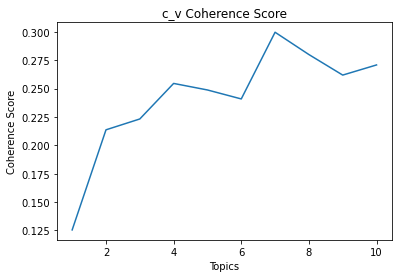

In [8]:
coherence_score_viz(aristotle['cleaned'],'c_v',1,11,corpora,gensim.models.LdaMulticore,plt,CoherenceModel,path_def)

In [5]:
#https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.filter_extremes.html
#https://www.baeldung.com/cs/topic-modeling-coherence-score

In [23]:
#Number of topics
num_topics = 5

#Final LDA model after determining number of topics
id2word = corpora.Dictionary(aristotle['cleaned'])
id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [id2word.doc2bow(doc) for doc in aristotle['cleaned']]

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=999)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.017*"come" + 0.016*"thing" + 0.013*"great" + 0.013*"tragedy" + '
  '0.013*"say" + 0.011*"time" + 0.011*"point" + 0.009*"form" + 0.008*"move" + '
  '0.008*"state"'),
 (1,
  '0.017*"animal" + 0.014*"small" + 0.013*"kind" + 0.013*"large" + '
  '0.012*"water" + 0.011*"contrary" + 0.011*"form" + 0.010*"reason" + '
  '0.010*"good" + 0.010*"sense"'),
 (2,
  '0.018*"man" + 0.018*"poet" + 0.017*"animal" + 0.015*"act" + 0.015*"body" + '
  '0.014*"belong" + 0.012*"state" + 0.011*"change" + 0.009*"wind" + '
  '0.009*"friendship"'),
 (3,
  '0.020*"thing" + 0.016*"think" + 0.014*"cause" + 0.014*"part" + 0.013*"way" '
  '+ 0.013*"matter" + 0.010*"place" + 0.010*"take" + 0.009*"number" + '
  '0.009*"time"'),
 (4,
  '0.045*"man" + 0.036*"thing" + 0.033*"good" + 0.013*"case" + 0.010*"mean" + '
  '0.010*"excellence" + 0.010*"say" + 0.009*"bad" + 0.009*"word" + '
  '0.009*"law"')]


In [24]:
#Appending the highest probability topic to each sentence
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)
topic_id_list = all_topics_df.idxmax(axis=1)
aristotle['topics'] = topic_id_list

In [39]:
#Cleaning to create wordcloud
topic_wordcloud = aristotle.groupby('topics')['cleaned_str'].apply(list)
topic_wordcloud[:] = [' '.join(map(str, l)) for l in topic_wordcloud[:]]
topic_wordcloud_df=pd.DataFrame(topic_wordcloud)
topic_wordcloud_df['cleaned_str'] = topic_wordcloud_df['cleaned_str'].str.replace("thing,", "")

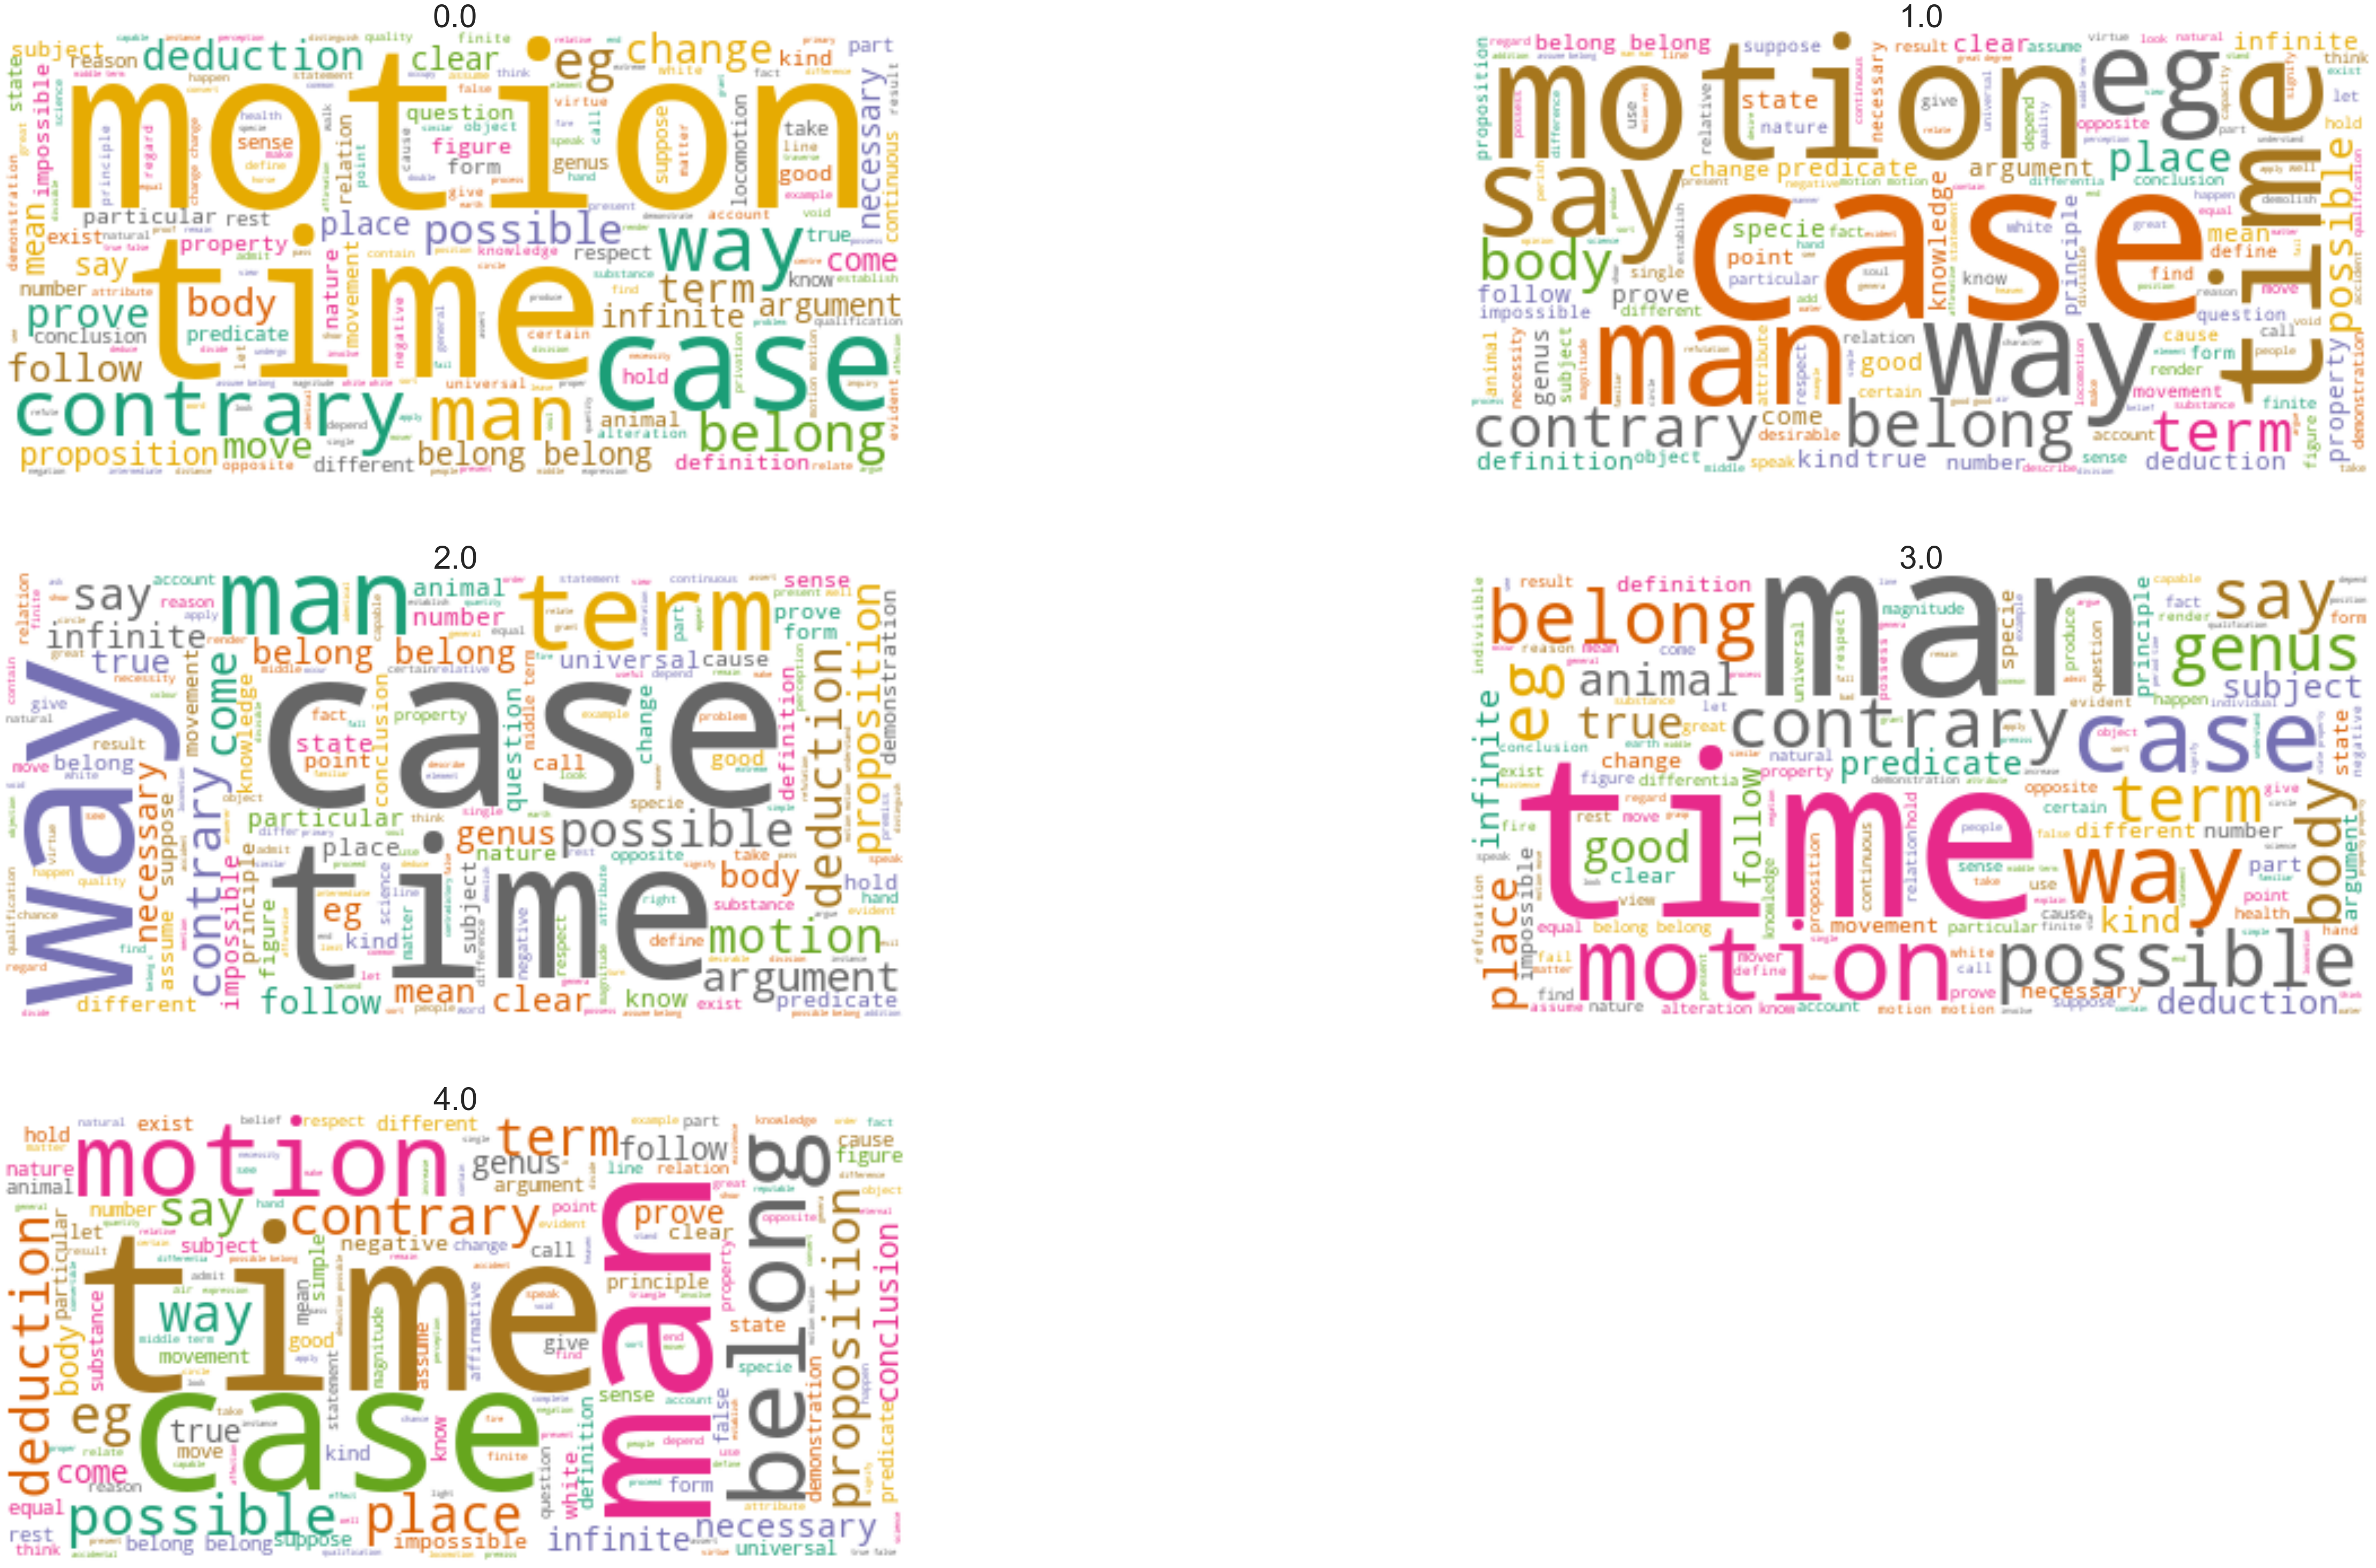

In [20]:
#Displaying wordcloud of all the topics
sns.set()
plt.rcParams['figure.figsize'] = [90, 90]

x, y = np.ogrid[:300, :300]

wordcloud = WordCloud(background_color="white", contour_width=0.1, 
                      contour_color="black",  max_font_size=100, random_state=42,
                      colormap="Dark2")

for i in range(5):
    wordcloud.generate(text=topic_wordcloud_df['cleaned_str'][i])   
    plt.subplot(5, 2, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(topic_wordcloud_df.index[i], fontdict={'fontsize': 60})
plt.savefig(path_def+'output/topic_wc.png')
plt.show()

In [26]:
#Visualizing intertopic distance and relevant terms of topic
pyLDAvis.enable_notebook()
p = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(p, path_def+'output/pyLDAvis.html')
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.057870  0.021937       1        1  24.675321
1      0.140965 -0.021123       2        1  20.562254
0      0.003376  0.001556       3        1  20.539043
3     -0.062942 -0.106212       4        1  17.878847
2     -0.023529  0.103842       5        1  16.344536, topic_info=         Term         Freq        Total Category  logprob  loglift
8         man  5849.000000  5849.000000  Default  30.0000  30.0000
114      good  3802.000000  3802.000000  Default  29.0000  29.0000
420      poet  1027.000000  1027.000000  Default  28.0000  28.0000
926   tragedy   940.000000   940.000000  Default  27.0000  27.0000
585       act  1393.000000  1393.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
34       kind   391.914833  2622.051272   Topic5  -4.9779  -0.0894
101  contrary   343.491162  1493.065997   Topic5  -5.1098   0.3419
5       thing   412.259586  6262.114902   Topic5  -4.9273  -0.9093
218    nature   325.679293  2050.360299   Topic5  -5.1630  -0.0286
21       mean   307.780791  1854.352023   Topic5  -5.2196   0.0154

[342 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
841       2  0.050647  abundant
841       3  0.016882  abundant
841       4  0.016882  abundant
841       5  0.911637  abundant
585       1  0.097566       act
...     ...       ...       ...
362       5  0.128512     write
775       2  0.002009     young
775       3  0.643005     young
775       4  0.070329     young
775       5  0.285334     young

[1080 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])

In [41]:
from subjectivity_modelling import subjectivity
subjectivity(aristotle, 12, TextBlob)

title     author     school  \
38366  Aristotle - Complete Works  Aristotle  aristotle   
38367  Aristotle - Complete Works  Aristotle  aristotle   
38368  Aristotle - Complete Works  Aristotle  aristotle   
38369  Aristotle - Complete Works  Aristotle  aristotle   
38370  Aristotle - Complete Works  Aristotle  aristotle   
...                           ...        ...        ...   
87140  Aristotle - Complete Works  Aristotle  aristotle   
87141  Aristotle - Complete Works  Aristotle  aristotle   
87142  Aristotle - Complete Works  Aristotle  aristotle   
87143  Aristotle - Complete Works  Aristotle  aristotle   
87144  Aristotle - Complete Works  Aristotle  aristotle   

                                          sentence_spacy  \
38366   When things have only a name in common and th...   
38367  Thus, for example, both a man and a picture ar...   
38368  These have only a name in common and the defin...   
38369  When things have the name in common and the de...   
38370  Thus, for example, both a man and an ox are an...   
...                                                  ...   
87140  ; which is a great advantage, since the more c...   
87141  consider the Oedipus of Sophocles, for instanc...   
87142  There is less unity in the imitation of the ep...   
87143  In saying that there is less unity in an epic,...   
87144  If, then, tragedy is superior in these respect...   

                                            sentence_str  \
38366   When things have only a name in common and th...   
38367  Thus, for example, both a man and a picture ar...   
38368  These have only a name in common and the defin...   
38369  When things have the name in common and the de...   
38370  Thus, for example, both a man and an ox are an...   
...                                                  ...   
87140  ; which is a great advantage, since the more c...   
87141  consider the Oedipus of Sophocles, for instanc...   
87142  There is less unity in the imitation of the ep...   
87143  In saying that there is less unity in an epic,...   
87144  If, then, tragedy is superior in these respect...   

       original_publication_date  corpus_edition_date  sentence_length  \
38366                       -320                 1991              139   
38367                       -320                 1991               56   
38368                       -320                 1991              207   
38369                       -320                 1991              134   
38370                       -320                 1991               52   
...                          ...                  ...              ...   
87140                       -320                 1991              137   
87141                       -320                 1991              118   
87142                       -320                 1991              308   
87143                       -320                 1991              333   
87144                       -320                 1991              324   

                                        sentence_lowered  \
38366   when things have only a name in common and th...   
38367  thus, for example, both a man and a picture ar...   
38368  these have only a name in common and the defin...   
38369  when things have the name in common and the de...   
38370  thus, for example, both a man and an ox are an...   
...                                                  ...   
87140  ; which is a great advantage, since the more c...   
87141  consider the oedipus of sophocles, for instanc...   
87142  there is less unity in the imitation of the ep...   
87143  in saying that there is less unity in an epic,...   
87144  if, then, tragedy is superior in these respect...   

                                           tokenized_txt  \
38366  ['when', 'things', 'have', 'only', 'name', 'in...   
38367  ['thus', 'for', 'example', 'both', 'man', 'and...   
38368  ['these', 'have', 'only', 'name', 'in', 'commo...   
38369  ['when', 'things', '

In [42]:
aristotle.groupby(['topics'])['subjectivity'].mean()

topics
0.0    0.318096
1.0    0.337955
2.0    0.321738
3.0    0.310212
4.0    0.334061
Name: subjectivity, dtype: float64

In [43]:
df['cleaned_str'] = [' '.join(map(str, l)) for l in df['cleaned']]
subjectivity(df, 12, TextBlob)

title author    school  \
0       Plato - Complete Works  Plato     plato   
1       Plato - Complete Works  Plato     plato   
2       Plato - Complete Works  Plato     plato   
3       Plato - Complete Works  Plato     plato   
4       Plato - Complete Works  Plato     plato   
...                        ...    ...       ...   
360803  Women, Race, And Class  Davis  feminism   
360804  Women, Race, And Class  Davis  feminism   
360805  Women, Race, And Class  Davis  feminism   
360806  Women, Race, And Class  Davis  feminism   
360807  Women, Race, And Class  Davis  feminism   

                                           sentence_spacy  \
0        What's new, Socrates, to make you leave your ...   
1       Surely you are not prosecuting anyone before t...   
2       The Athenians do not call this a prosecution b...   
3                                   What is this you say?   
4       Someone must have indicted you, for you are no...   
...                                                   ...   
360803  But the socialization of housework including m...   
360804  The only significant steps toward endingdomest...   
360805  Working women, therefore, have a special and v...   
360806  Moreover, under capitalism, campaigns for jobs...   
360807  This strategy calls into question the validity...   

                                             sentence_str  \
0        What's new, Socrates, to make you leave your ...   
1       Surely you are not prosecuting anyone before t...   
2       The Athenians do not call this a prosecution b...   
3                                   What is this you say?   
4       Someone must have indicted you, for you are no...   
...                                                   ...   
360803  But the socialization of housework including m...   
360804  The only significant steps toward endingdomest...   
360805  Working women, therefore, have a special and v...   
360806  Moreover, under capitalism, campaigns for jobs...   
360807  This strategy calls into question the validity...   

        original_publication_date  corpus_edition_date  sentence_length  \
0                            -350                 1997              125   
1                            -350                 1997               69   
2                            -350                 1997               74   
3                            -350                 1997               21   
4                            -350                 1997              101   
...                           ...                  ...              ...   
360803                       1981                 1981              142   
360804                       1981                 1981              117   
360805                       1981                 1981               90   
360806                       1981                 1981              199   
360807                       1981                 1981              126   

                                         sentence_lowered  \
0        what's new, socrates, to make you leave your ...   
1       surely you are not prosecuting anyone before t...   
2       the athenians do not call this a prosecution b...   
3                                   what is this you say?   
4       someone must have indicted you, for you are no...   
...                                                   ...   
360803  but the socialization of housework including m...   
360804  the only significant steps toward endingdomest...   
360805  working women, therefore, have a special and v...   
360806  moreover, under capitalism, campaigns for jobs...   
360807  this strategy calls into question the validity...   

                                            tokenized_txt  \
0       ['what', 'new', 'socrates', 'to', 'make', 'you...   
1       ['surely', 'you', 'are', 'not', 'prosecuting',...   
2       ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3                    ['what', 'is', 'this', 'you', 'say']   
4      

In [44]:
df.groupby('school').agg({'subjectivity': ['mean']})

subjectivity
                        mean
school                      
analytic            0.286684
aristotle           0.341157
capitalism          0.367580
communism           0.290665
continental         0.314276
empiricism          0.357706
feminism            0.361778
german_idealism     0.312720
nietzsche           0.333113
phenomenology       0.283388
plato               0.319806
rationalism         0.366719
stoicism            0.329450

In [45]:
abstracts = pd.read_csv(path_def+'data/covid_abstracts.csv')
abstracts.head()

title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   

                                        url  
0  https://pubmed.ncbi.nlm.nih.gov/35008137  
1  https://pubmed.ncbi.nlm.nih.gov/35008104  
2  https://pubmed.ncbi.nlm.nih.gov/35007996  
3  https://pubmed.ncbi.nlm.nih.gov/35007991  
4  https://pubmed.ncbi.nlm.nih.gov/35007959

In [ ]:
cleaner(nlp,abstracts,abstracts.abstract)
abstracts['cleaned_str'] = [' '.join(map(str, l)) for l in abstracts['cleaned']]

In [ ]:
subjectivity(abstracts, 4, TextBlob)
abstracts['subjectivity'].mean()

A sentence like 'The impact of the coronavirus disease 2019 (COVID-19) pandemic on well-being has the potential for serious negative consequences on work, home life, and patient care.' found in one of the abstracts, is actually a subjective sentence.

In [ ]:
https://levelup.gitconnected.com/simple-nlp-in-python-2cb3243239d3